# **Iris Flower Classification**

### **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the Iris Dataset from CSV**

In [2]:
data = pd.read_csv("Iris Flower - Iris.csv")

### **Display Pairwise Scatterplots (Graphs)**

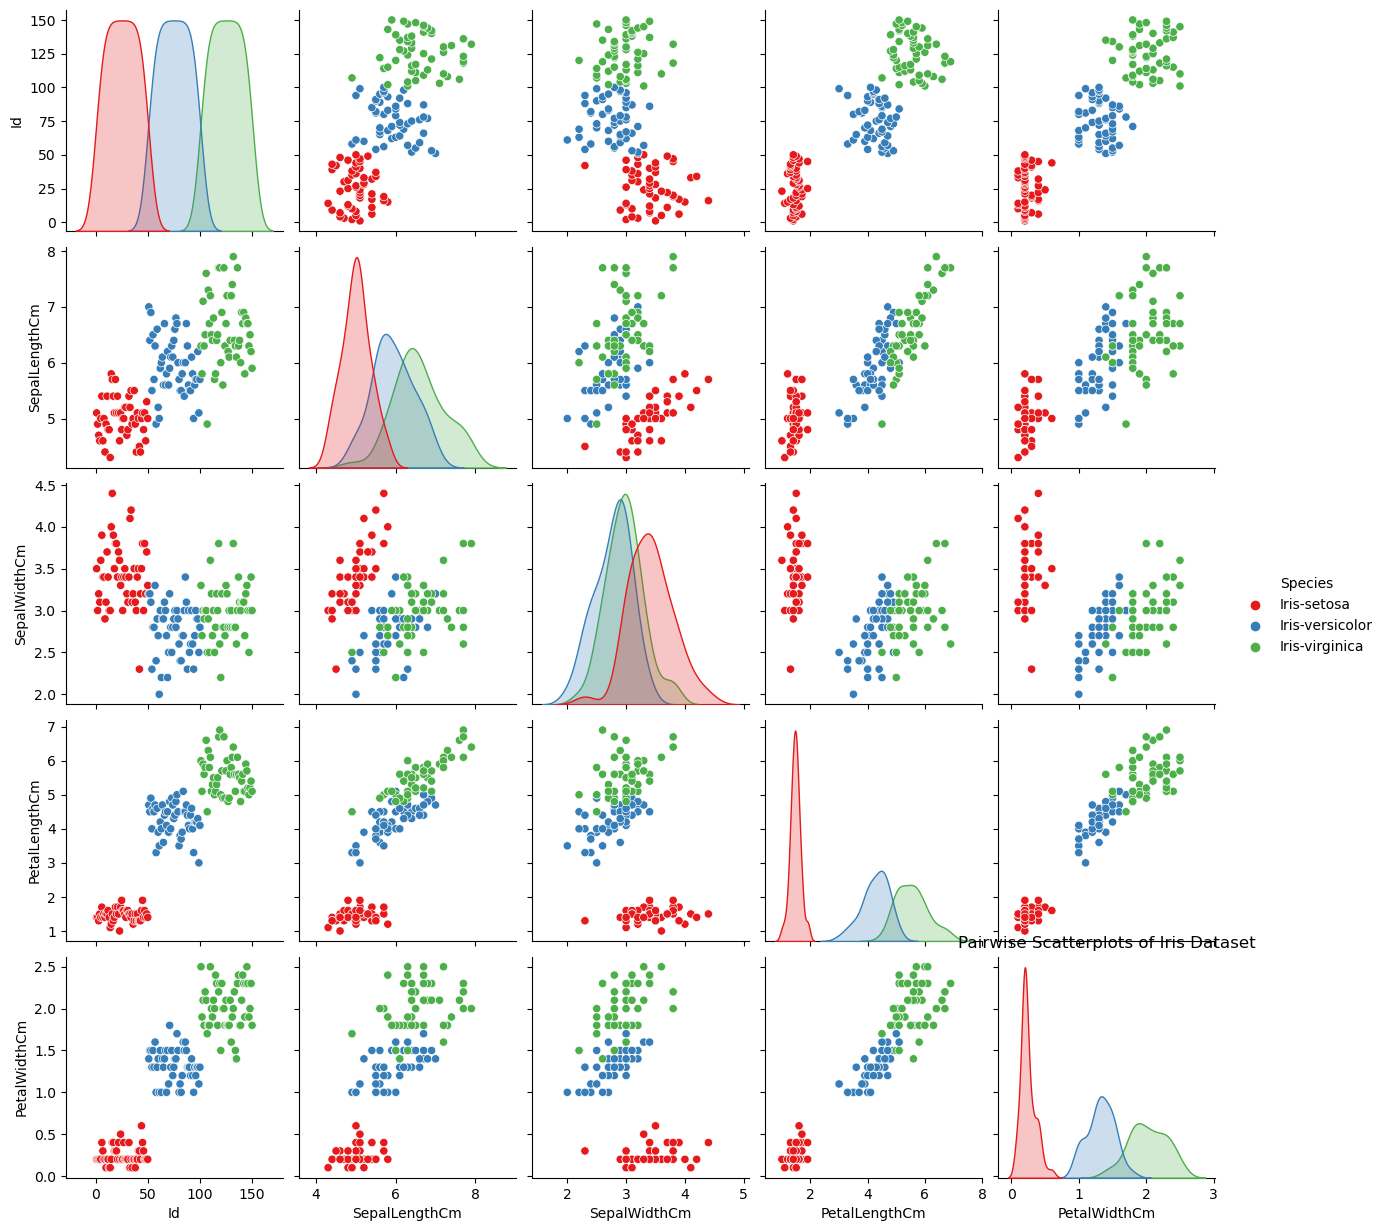

In [3]:
sns.pairplot(data=data, hue='Species', palette='Set1')
plt.title("Pairwise Scatterplots of Iris Dataset")
plt.show()

### **Display Correlation Matrix**

C:\Users\SOMESHWAR\AppData\Local\Temp\ipykernel_17404\704762441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


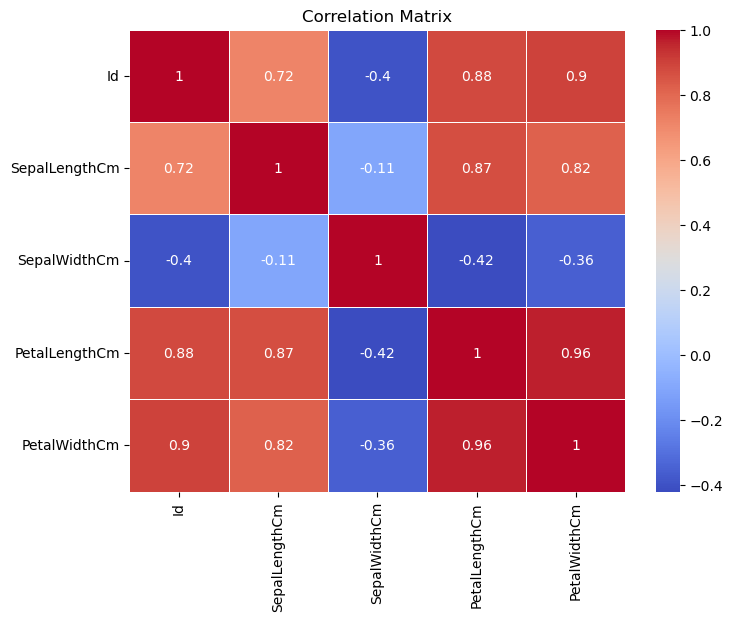

In [4]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### **Prepare the Data**

In [5]:
X = data.drop(columns=["Id", "Species"])
y = data["Species"]

### **Split the Dataset**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### **Feature Scaling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Train a Machine Learning Model with Hyperparameter Tuning**

In [8]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

### **Get the best hyperparameter value**

In [9]:
best_k = grid_search.best_params_['n_neighbors']

### **Make Predictions**

In [10]:
best_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

### **Evaluate Model Performance**

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
